# Data
in this project we are using US flight data of 2008. The data is available http://stat-computing.org/dataexpo/2009/the-data.html along with data dictionary. 

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv('C:/Users/ameimand/Documents/Thinkful/Codes/Data/2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


# Flight rate and Seaonal Effect of Delay
Compute the total number of flights and average delay per month to see:
1- if the rate of flight is consistent over time
2- if there is any sort of seasonal effect on delay 

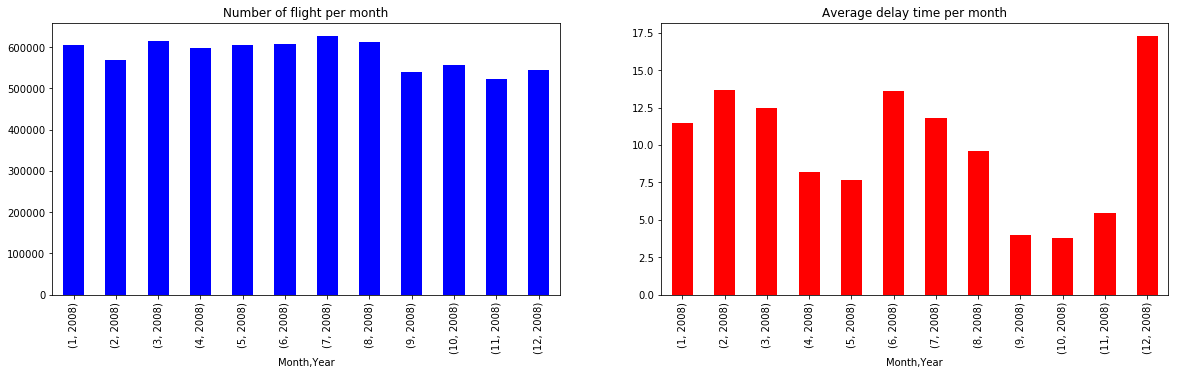

In [22]:
#Plot distance vs travel time
Freq=df.groupby(['Month','Year']).count()
Avg=df.groupby(['Month','Year']).mean()


plt.figure(figsize=(20, 5))


plt.subplot(1, 2, 1)
Freq['DayofMonth'].plot.bar(title='Number of flight per month',color='blue')

plt.subplot(1, 2, 2)
Avg['DepDelay'].plot.bar(title='Average delay time per month',color='red')

plt.show()

# Correlation 
Create the scatter plot for Distance vs Time to see if there is any correlation.

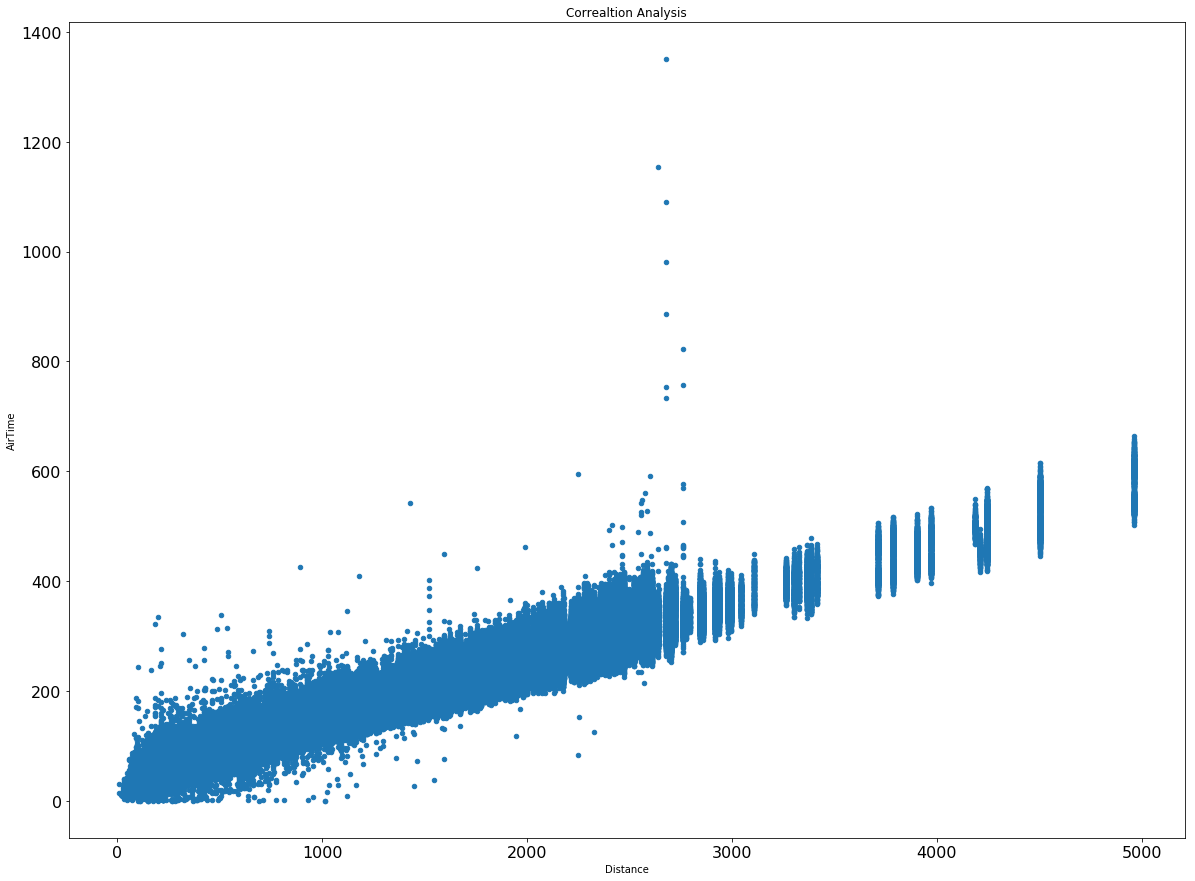

In [23]:
#Plot distance vs travel time
plt.figure(figsize=(10, 10))
#plt.scatter(x=df['Distance'], y=df['AirTime']) 
df.plot(kind='scatter', fontsize = 16, x='Distance', y='AirTime',figsize=(20, 15),title  = 'Correaltion Analysis')
plt.show()

# Delay Distribution 
In this part we are interested in having the delay time distribution globally, also comparing the distribution of first and last 6 months of the year to see if there is any difference.  

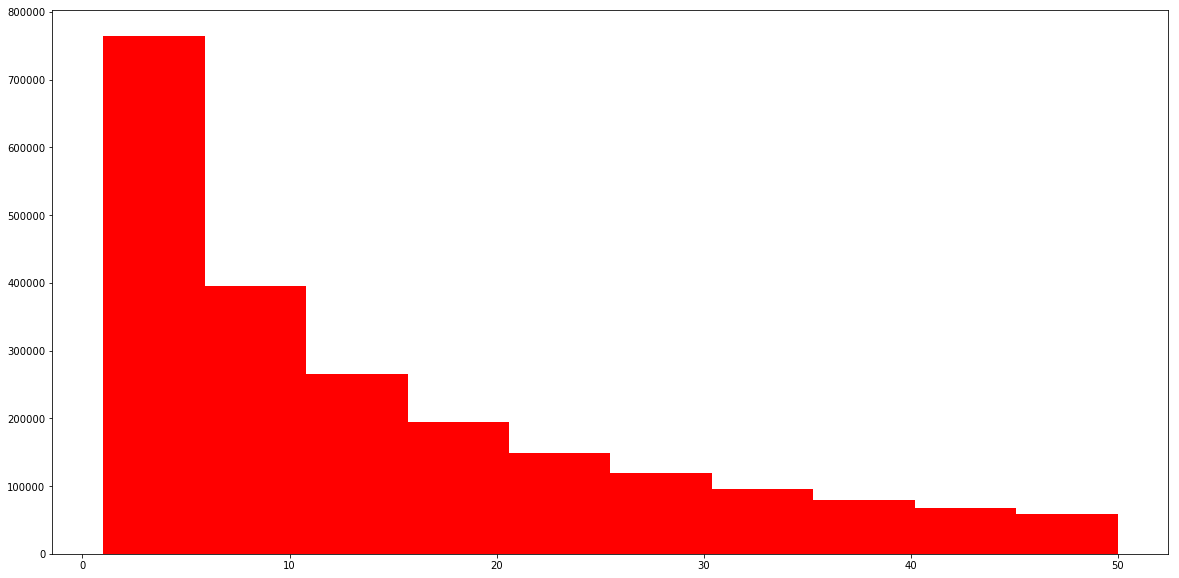

In [24]:
#For the flights with no Delat the value of 'DepDelat' is NaN, the following method replace any nan value with zero
x=df['DepDelay'].fillna(0)

#Plot the histogram of delay
plt.figure(figsize=(20, 10))
plt.hist(x,range=[1, 50],bins=10, color='red') 
plt.show()


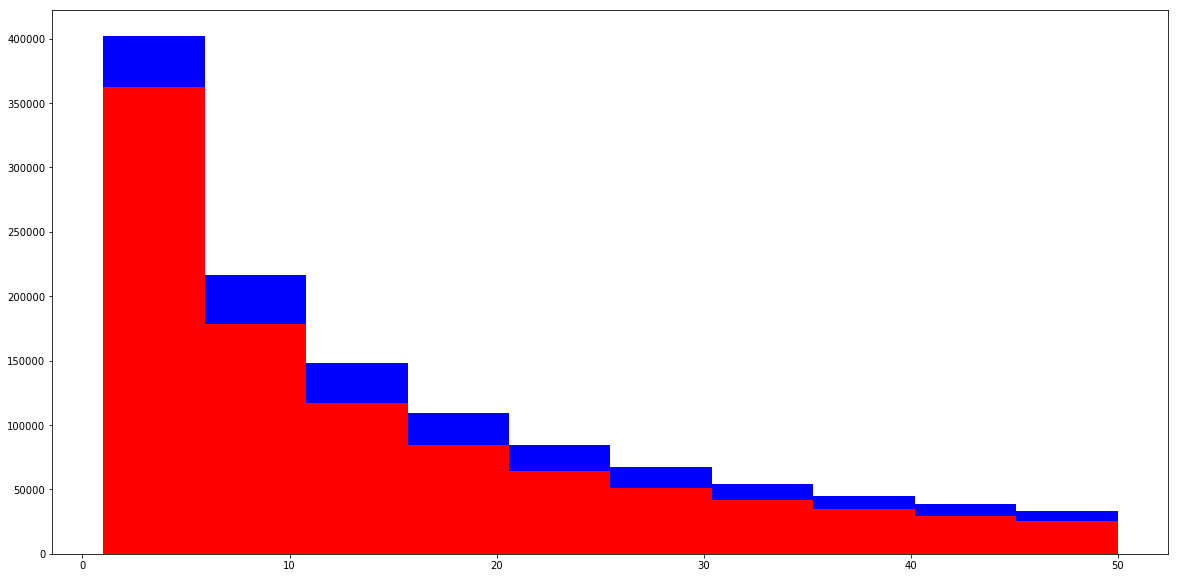

In [25]:
#Dealy for the first 6 month of the year
x1=df[df['Month'] <= 6]['DepDelay']
x1=x1.fillna(0)

#Dealy for the last 6 month of the year
x2=df[df['Month'] > 6]['DepDelay']
x2=x2.fillna(0)

# Plot histogram of delay for first and last 6 months
plt.figure(figsize=(20, 10))
plt.hist(x1, color='blue', range=[1, 50], bins=10) 
plt.hist(x2, color='red', range=[1, 50], bins=10)

plt.show()

# Airport Comparison
In this part we are interested in using boxplot to be able to compare the delay time of four major airport

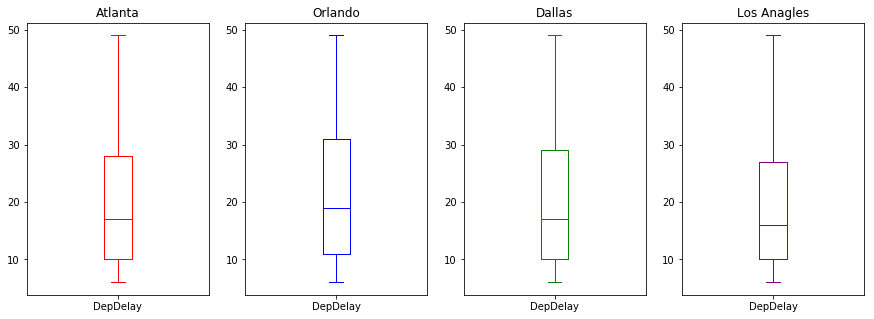

In [26]:
x1=df[(df['Origin'] == 'ATL') & (df['DepDelay'] < 50) & (df['DepDelay'] > 5)]['DepDelay']
x1=x1.fillna(0)

x2=df[(df['Origin'] == 'ORD') & (df['DepDelay'] < 50) & (df['DepDelay'] > 5)]['DepDelay']
x2=x2.fillna(0)

x3=df[(df['Origin'] == 'DFW') & (df['DepDelay'] < 50) & (df['DepDelay'] > 5)]['DepDelay']
x3=x3.fillna(0)

x4=df[(df['Origin'] == 'LAX') & (df['DepDelay'] < 50) & (df['DepDelay'] > 5)]['DepDelay']
x4=x4.fillna(0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
x1.plot(kind='box',color='red',title  = 'Atlanta')

plt.subplot(1, 4, 2)
x2.plot(kind='box',color='blue',title  = 'Orlando')

plt.subplot(1, 4, 3)
x3.plot(kind='box',color='green',title  = 'Dallas')

plt.subplot(1, 4, 4)
x4.plot(kind='box',color='purple',title  = 'Los Anagles')

plt.show()


# Top airports

In this part we are using bar chart to figure out the top 20 airport with more: 1- total number of flights 2- Total delay time 3- average delay time per flight

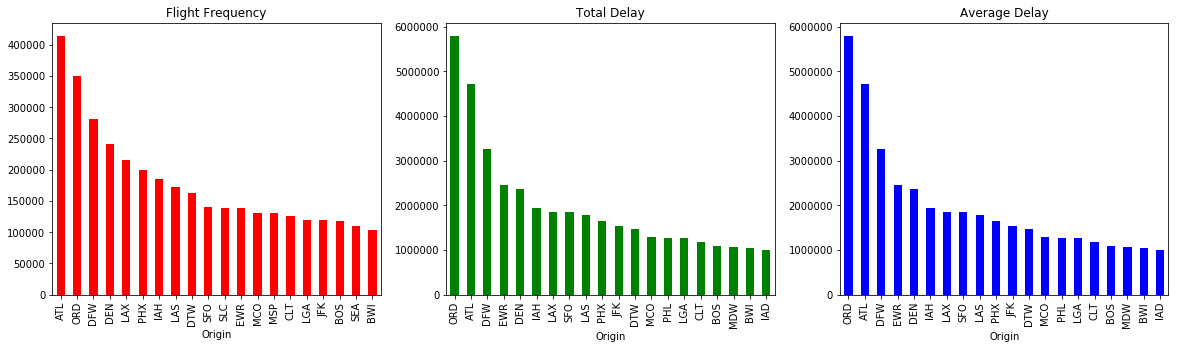

In [27]:
#Summrize the frequency of flight within each origin
Freq=df.groupby('Origin').count()['Year'].sort_values(axis=0, ascending=False)
#Summrize the total delay  within each origin
Total_Delay=df.groupby('Origin').sum()['DepDelay'].sort_values(axis=0, ascending=False)
#Summrize the averagedelay within each origin
Avg_Delay=df.groupby('Origin').mean()['DepDelay'].sort_values(axis=0, ascending=False)

#Plot the histogram of frequency and total delay for top 20 origins
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
Freq.nlargest(20).plot(kind='bar',color='red',title='Flight Frequency')

plt.subplot(1, 3, 2)
Total_Delay.nlargest(20).plot(kind='bar',color='green',title='Total Delay')

plt.subplot(1, 3, 3)
Total_Delay.nlargest(20).plot(kind='bar',color='blue',title='Average Delay')

plt.show()

# Cancelation analysis
We want to use pie chart to show the breakdown of cancelation for different reason.  

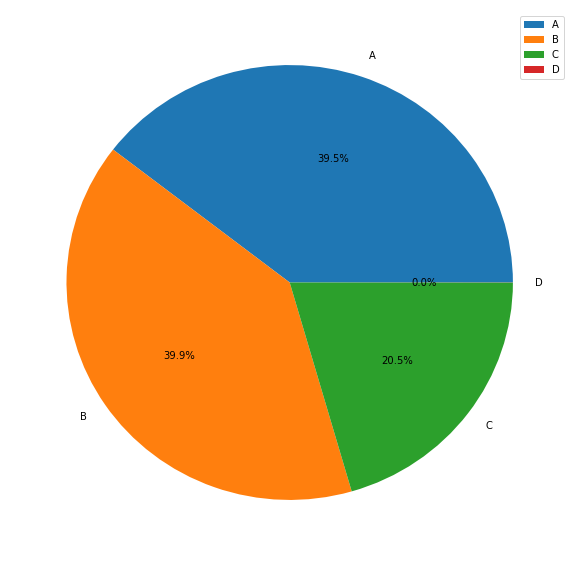

In [28]:
#Plot the % of cancelation based on cancelation type
Canl_Summary=df.groupby('CancellationCode').size()
plt.figure(figsize=(10, 10))
plt.pie(Canl_Summary, labels=Canl_Summary.index, autopct='%1.1f%%')
plt.legend(Canl_Summary.index)
plt.show()